# Summation of Primes
The sum of the primes below 10 is 2 + 3 + 5 + 7 = 17.

Find the sum of all the primes below two million.


## Solution One - Brute Force
The simplest way to generate the primes we need is by brute force, that is dividing every number bellow two million by every number bellow that number.

**NOTE** This solution is to slow to solve the problem on my computer

In [2]:
from utils.timing import timed


@timed(1)
def solution_one(upper_bound: int = 20000000) -> int:
    """
    finds the sum of every prime bellow the provided limit

    :param upper_bound: upper bound for primes
    """
    answer: int = 0

    for prime in range(2, upper_bound):
        is_prime: bool = True

        for divisor in range(2, prime):
            
            if not prime % divisor:
                is_prime = False
                break

        if is_prime:
            answer += prime

    return answer

answer, time = solution_one(20000)
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 21171191
that took: 1.1774518919999082s


### Solution One Discussion
Solution one is extremely slow, because of the two nested loops: in the worst case we have to do $n^2$ divisions. However, solution one is very efficient in terms of memory, only having to store a cuple variables.

## Solution Two - Brute Force With Domain Restrictions
Solution One's main flaw is having to check up to $n - 1$ possible divisors to verify if $n$ is prime. Therefore, one quick way to improve its performance would be to limit the number of divisors checked. To achieve that, instead of checking every number up to $n - 1$, we just need to check every number up to $\sqrt{n}$. Moreover, we can use a generator to skip over all even numbers except 2 further improving the performance.

In [3]:
from math import floor, sqrt
from typing import Iterator
from utils.timing import timed


def possible_primes(upper_bound: int) -> Iterator[int]:
    """
    Generates possible primes up to the limit provided

    :param upper_bound: limit for generating possible primes
    """
    number: int = 2

    while number < upper_bound:
        yield number

        if number == 2:
            number += 1

        else:
            number += 2


@timed(1)
def solution_two(upper_bound: int = 20000000) -> int:
    """
    finds the sum of every prime bellow the provided limit

    :param upper_bound: upper bound for primes
    """
    answer: int = 0

    for prime in possible_primes(upper_bound):
        is_prime: bool = True

        for divisor in possible_primes(floor(sqrt(prime)) + 1):
            
            if not prime % divisor:
                is_prime = False
                break

        if is_prime:
            answer += prime

    return answer


answer, time = solution_two()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 12272577818052
that took: 233.59972170499987s


### Solution Two Discussion
Solution two is already much better than solution one. While the generator offers a good increase in performance, the limit we imposed on the divisors we test is the biggest improvement of this solution reducing the worst case from $n^2$ divisions to $n\sqrt{n}$. Moreover, solution two has about the same memory usage as solution one.

## Solution Three - Using Previous Primes
If memory is not an issue, using previously generated primes we can further reduce the number of divisions we have to do to check if a number is prime.

In [4]:
from math import floor, sqrt
from typing import Iterator
from utils.timing import timed


def possible_primes(upper_bound: int) -> Iterator[int]:
    """
    Generates possible primes up to the limit provided

    :param upper_bound: limit for generating possible primes
    """
    number: int = 2

    while number < upper_bound:
        yield number

        if number == 2:
            number += 1

        else:
            number += 2


@timed(1)
def solution_three(upper_bound: int = 20000000) -> int:
    """
    finds the sum of every prime bellow the provided limit

    :param upper_bound: upper bound for primes
    """
    primes: List[int] = []
        
    for prime in possible_primes(upper_bound):
        upper_boud: int = floor(sqrt(prime))
        is_prime: bool = True
        
        for i in primes:
            
            if not prime % i:
                is_prime = False
                break
                
            if i > upper_boud:
                break
                
        if is_prime:
            primes.append(prime)
    
    return sum(primes)

answer, time = solution_three()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 12272577818052
that took: 33.71409042100004s


### Solution Three Discussion
Solution three is even better than solution two in terms of performance since there are even less divisions we have to make to check if a number is prime. However, this solution is more expensive in terms of memory, having to store all previously generated primes in a list.

## Solution Four - Sieve of Eratosthenes
Because we already know the maximum possible size of a prime, we can further improve performance by using the sieve of Eratosthenes. The algorithm consists of the following steps:
1. create a list from 2 to $n$
2. select $p$ as the first prime number in the list (2)
3. remove all multiples of $p$ from the list
4. set $p$ equal to the next number in the list
5. repeat steps 3 and for until $p \geq \sqrt{n}$

[Wikipedia's](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes) article has a really nice ilustration of how the algorithm works.

In [22]:
from math import floor, sqrt
from typing import Iterator
from utils.timing import timed


@timed(1)
def solution_four(upper_bound: int = 20000000) -> int:
    """
    finds the sum of every prime bellow the provided limit

    :param upper_bound: upper bound for primes
    """
    numbers: List[bool] = [True for _ in range(2, upper_bound)]
    answer: int = 0
    i: int

    for i in range(floor(sqrt(upper_bound)) - 1):

        if numbers[i]:
            answer += i + 2

            for j in range(i, upper_bound - 2, i + 2):
                numbers[j] = False

    for i in range(i, upper_bound - 2):
        answer += i + 2 if numbers[i] else 0

    return answer


answer, time = solution_four()
print(f'the answers if: {answer}')
print(f'that took: {time}s')


the answers if: 12272577818052
that took: 3.7362053750002815s


## Plots

### Comparing All The Solutions

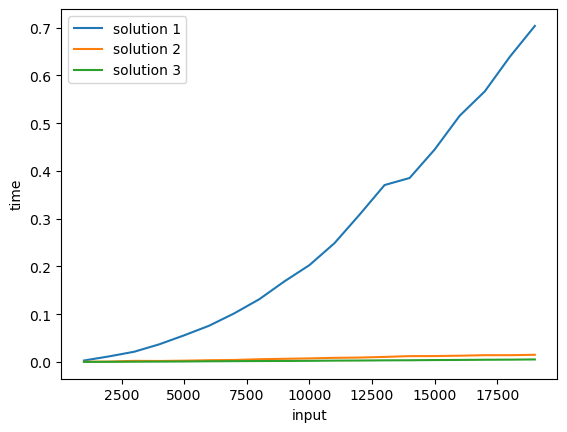

In [9]:
from utils.plotting import plot_range

params = tuple((i, ) for i in range(1000, 20000, 1000))
plot_range(params, (solution_one, solution_two, solution_three))